In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [6]:
img_ = cv2.imread("right.jpeg")
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread("left.jpeg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [10]:
'''For image stitching, we have the following major steps to follow:

Compute the sift-keypoints and descriptors for both the images.
Compute distances between every descriptor in one image and every descriptor in the other image.
Select the top ‘m’ matches for each descriptor of an image.
Run RANSAC to estimate homography
Warp to align for stitching
Now stitch them together
'''

'For image stitching, we have the following major steps to follow:\n\nCompute the sift-keypoints and descriptors for both the images.\nCompute distances between every descriptor in one image and every descriptor in the other image.\nSelect the top ‘m’ matches for each descriptor of an image.\nRun RANSAC to estimate homography\nWarp to align for stitching\nNow stitch them together\n'

In [11]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)

In [15]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [30]:
good=[]
for m in matches:
    if m[0].distance<0.5*m[1].distance:
        good.append(m)
matches=np.asarray(good)

In [38]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

else:
    raise AssertionError('Can’t find enough keypoints.')

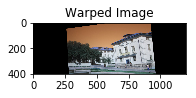

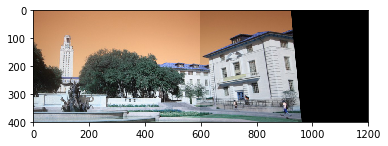

In [40]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()